# Sampling Distribution

## D19001-Abhilasha Chourasia-Bootstrapping

### Bootstrap- It is widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method.Example, the bootstrap can be used to estimate the standard errors of the coefficients from a linear regression fit.

### Algorithm:
    1.Let 'S' be a sample of size 'n'.
    2.Draw a random sample 'D' of size 'n' with replacement from 'S'.(this is the method we use in Bootstrapping).
    3.Calculate the estimate 'e' based on 'D'.
    4.Repeat step 2 and 3 for k-times and get estimates e1,e2,...,ek.
    5.Standard Error (estimator) = Standard Deviation(e1,e2,...,ek).

#### Let's see the Bootstrapping method on attrition data. The variable of the interest is monthly income.

In [1]:
#packages for Bootstrapping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns
import statsmodels.api as stm

#Setting the working directory
os.chdir("C:\\Users\\abhi3\\Downloads")

#Reading the data
attr = pd.read_csv("attrition.csv")

In [2]:
attr.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2


In [3]:
#reading the monthly income attribute to a variable and calculating the mean for it
m_income=attr.MonthlyIncome
print(np.mean(m_income))


6502.931292517007


#### Q1.Plot the distribution of monthly income. This will be the population distribution of the variable

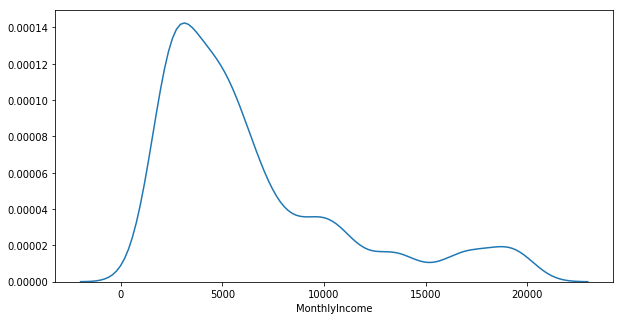

In [4]:
#plotting the monthly income distribution
plt.figure(figsize=(10,5))
sns.distplot(m_income,hist=False)
plt.show()

##### OBSERVATION: As we can see the distribution is right skewed so the calculated the mean for monthly income is 6502.93 which is slightly at right to mode and median

In [5]:
#to know the no. of rows
m_income.shape

(1470,)

#### Q2.Draw a sample of size 200. Plot the sample distribution of the variable and comment on whether it represents the population distribution

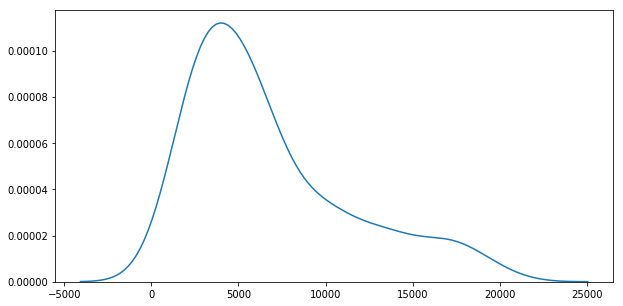

In [6]:
#Drawing sample of size 200 randomly from population monthly income and plotting the sample distribution
Xsam= np.random.choice(m_income,200,replace=False)   
plt.figure(figsize=(10,5))
sns.distplot(Xsam,hist=False)
plt.show()

In [7]:
#mean for the sample drawn
print(np.mean(Xsam))

6767.65


##### OBSERVATION:We can clearly see that the random drawn sample is representing the population distribution also the mean for the sample and population lies in the same range

#### Q3.Draw a random sample of size 200 with replacement from the sample collected in step 2.Plot the histogram and comment whether it represent sample and population distribution

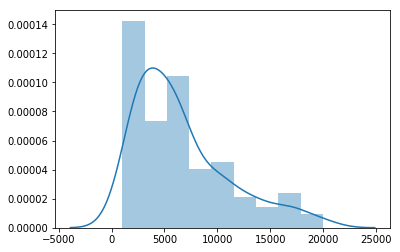

In [8]:
#Drawing sample of size 200 randomly with replacement from already drawn sample in step2 and plotting the sample distribution
Ysam= np.random.choice(Xsam,200,replace=True)
sns.distplot(Ysam,hist=True)
plt.show()

In [9]:
print(np.mean(Ysam))

6568.78


##### OBSERVATION:We can clearly see that the random drawn sample from already drawn sample in step 2 is representing the population distribution and sample distribution of step 2 also the mean for the smaple draw with replacement from sample in step2,sample draw in step 2 and population lies in the same range

#### Q4.Repeat the above step for 10 times and note your observations

6634.125
7255.66
6564.925
7058.935
6794.805
6370.04
6318.715
6460.56
6107.2
6680.885


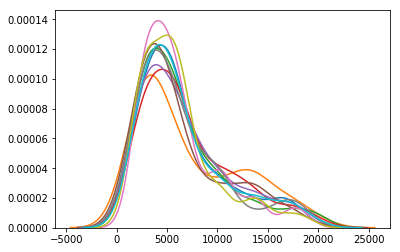

In [10]:
#Repeating the above step for 10 times
for j in range(0,10):
    Ysam= np.random.choice(Xsam,200,replace=True)
    sns.distplot(Ysam,hist=False)
    print(np.mean(Ysam))

##### OBSERVATION:from the above graph we can see that for resampling the sample with replacement gives approximately same distribution as of population and sample distribution at step2. Also the mean ranges the same.So we can say that Sample in step 2 represent population distribution, Sample drawn from the step 2 with replacement represents the sample drawn at step2, hence all the sample represent population distribution.

#### Q5.Check if CLT holds in the variable monthly income

In [11]:
#CLT Theorem on monthly income(population) is established and standard error is calculated also distribution 
#is plotted for every population size increases
def monthlyclt(n):
    mean_arrX=[]
    for j in range(0,10000):
        Xi= np.random.choice(m_income,n)       #random sampling n values from the population
        Xmean = np.mean(Xi)                    #calculating the mean for each sample
        mean_arrX.append(Xmean)                
    SE=np.std(mean_arrX)                       #Standard error calculation
    print('Standard Error:',SE)
    meantot=np.mean(mean_arrX)
    print('mean:',meantot)
    sns.distplot(mean_arrX,hist=False)         #Distribution plot for the mean
    sns.distplot(Xi,hist=False)
    print('S.D:',np.std(Xi)/math.sqrt(n))      #Verification of S.E
    

Standard Error: 335.40195544565614
mean: 6499.315652
S.D: 344.18529423771145


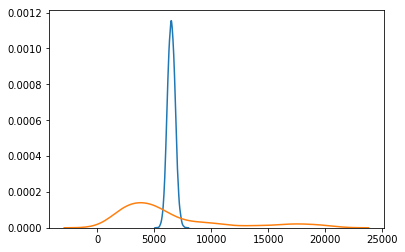

In [12]:
monthlyclt(200)

Standard Error: 149.96849982930487
mean: 6506.181009500001
S.D: 142.86113604817442


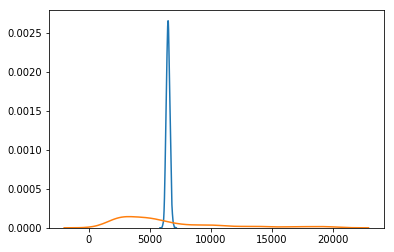

In [13]:
monthlyclt(1000)

Standard Error: 47.13732080095201
mean: 6503.36270951
S.D: 46.84337919188628


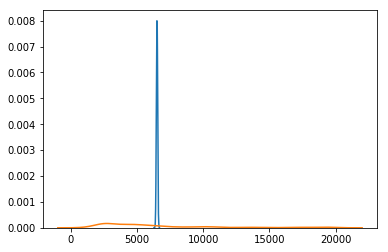

In [14]:
monthlyclt(10000)

##### OBSERVATION:As we know The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger so we can see the mean follows normal distribution as the data size increases. Also we can see the mean lies in the same range as per the population and sample drawn also as the sample size gets larger,Standard Error decreases. 

##### CONCLUSION:The Central Limit Theorem(CLT) holds for the  variable of interest i.e Monthly Income

#### Q6.Clculate a bootstrap estimate of the Standard Error of the average monthly income using the sample 'Xsam'. Check whether it agrees with the result of CLT

In [15]:
##CLT Theorem on average monthly income(Xsam(sample)with sample size 200) is established and standard error is calculated also distribution 
def bootclt():
    plt.figure(figsize=(8,5))
    mean_arrX=[]
    for j in range(0,10000):
        Xi= np.random.choice(Xsam,200,replace=True)
        Xmean = np.mean(Xi)
        mean_arrX.append(Xmean)
    SE=np.std(mean_arrX)
    print('Standard Error:',SE)
    meantot=np.mean(mean_arrX)
    print('mean:',meantot)
    sns.distplot(mean_arrX,hist=False)
    sns.distplot(Xi,hist=False)
    print('S.D:',np.std(Xi)/math.sqrt(200)) 

Standard Error: 328.560602930539
mean: 6770.7420145
S.D: 308.20400432809924


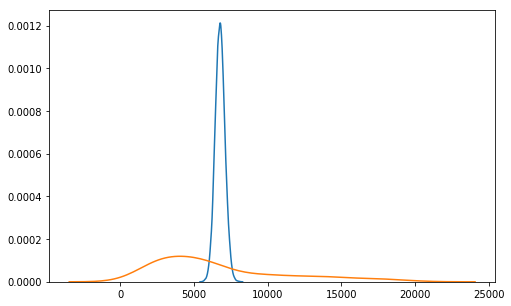

In [16]:
bootclt()

##### OBSERVATION:The mean distribution on the sample Xsam represents the population distribution of monthly income.We can see the standard error (for equal sample size or n)and mean is approximately lies in the same range. The resultant S.E when bootstrapping is approx. same as CLT result.

##### CONCLUSION: The bootstrapping agrees the Central Limit Theorem(CLT) for the variable of interest i.e Monthly Income